In [39]:
import pandas as pd
import numpy as np
from ib_insync import *
import matplotlib.pyplot as plt

In [40]:
util.startLoop()

In [ ]:
ib = IB()
ib.connect('127.0.0.1', 7497, clientId=1)


<IB connected to 127.0.0.1:7497 clientId=1>

Error 321, reqId 3: Error al validar la solicitud.-'bK' : causa - Historical data bar size setting is invalid. Legal ones are: 1 secs, 5 secs, 10 secs, 15 secs, 30 secs, 1 min, 2 mins, 3 mins, 5 mins, 10 mins, 15 mins, 20 mins, 30 mins, 1 hour, 2 hours, 3 hours, 4 hours, 8 hours, 1 day, 1W, 1M, contract: Stock(symbol='COIN', exchange='SMART', currency='USD')
Error 321, reqId 6: Error al validar la solicitud.-'bK' : causa - Historical data bar size setting is invalid. Legal ones are: 1 secs, 5 secs, 10 secs, 15 secs, 30 secs, 1 min, 2 mins, 3 mins, 5 mins, 10 mins, 15 mins, 20 mins, 30 mins, 1 hour, 2 hours, 3 hours, 4 hours, 8 hours, 1 day, 1W, 1M, contract: Stock(symbol='COIN', exchange='SMART', currency='USD')


In [42]:
# Definir el contrato, en este caso para la accion COIN
contract = Stock('COIN', 'SMART', 'USD')


In [52]:
bars = ib.reqHistoricalData(
    contract,
    endDateTime='',
    durationStr= '20 D',
    barSizeSetting= '1 day',
    whatToShow='TRADES',
    useRTH=True,
    formatDate=1

)

In [53]:
# convertir pandas a dataframe
df = pd.DataFrame(bars)
df['Fecha'] = pd.to_datetime(df['date'])
df['Precio'] = df['close']

In [54]:
max_price = df['Precio'].max()
min_price = df['Precio'].min()
diff = max_price - min_price

In [55]:
fibonacci_levels = [0.236, 0.382, 0.5, 0.618, 0.786]
fib_lines = [max_price - diff * level for level in fibonacci_levels]

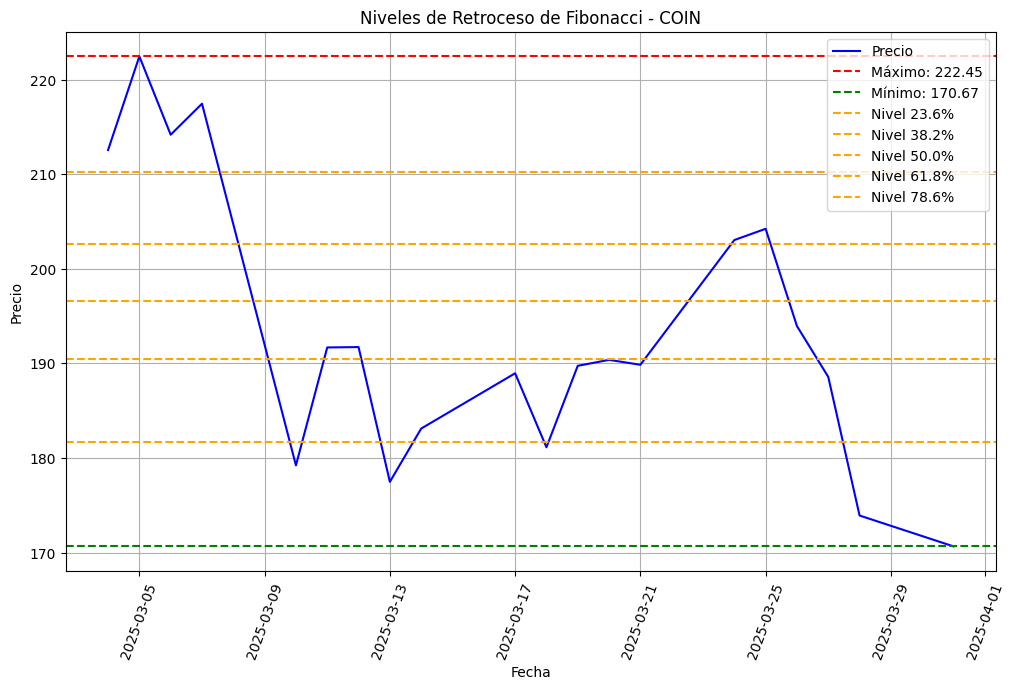

In [56]:
# Graficar
plt.figure(figsize=(12, 7))
plt.plot(df['Fecha'], df['Precio'], label='Precio', color='blue')
plt.axhline(y=max_price, linestyle='--', color='red', label=f'Máximo: {max_price}')
plt.axhline(y=min_price, linestyle='--', color='green', label=f'Mínimo: {min_price}')
plt.xticks(rotation = 70)

# Dibujar líneas de Fibonacci
for level, line in zip(fibonacci_levels, fib_lines):
    plt.axhline(y=line, linestyle='--', color='orange', label=f'Nivel {level*100:.1f}%')

#Ponemos nombres a nuestro mapa
plt.legend()
plt.title('Niveles de Retroceso de Fibonacci - COIN')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.grid()
plt.show()

In [57]:
ib.disconnect()